In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from src.utils import CustomDataset
from src.utils import Data

from src.NN import LSTM

Import data

In [2]:
### data file
file = "data/testData.csv"

### create dataframe
DataObj = Data(file)
df = DataObj.ImportData()

### define input (X) and output (y) data
X = np.array(df.X).reshape(-1,1)[:30000,:]
y = np.array(df.y).reshape(-1,1)[:30000,:]

Visualize the data

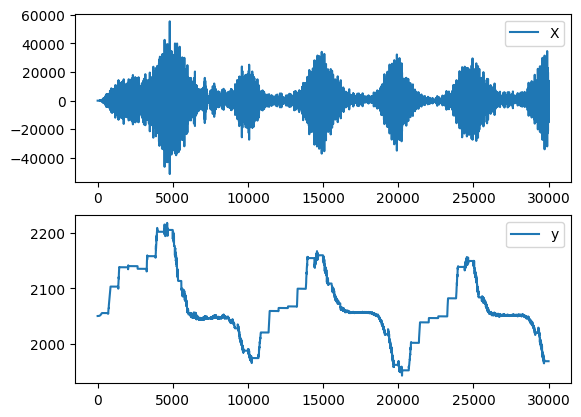

In [3]:
fig, ax = plt.subplots(2,1)

ax[0].plot(X.flatten(), label="X")
ax[0].legend()
ax[1].plot(y.flatten(), label="y")
ax[1].legend()

plt.show()

Normalize data

In [4]:
### normalize the training data
X = DataObj.Normalize(X)

In [5]:
horiz_len = 16
X_hzn = []
y_hzn = []
for i in range(len(y)-horiz_len-1):
    X_hzn.append(X[i:i+horiz_len,:])
    y_hzn.append(y[i+horiz_len+1])

X = np.array(X_hzn)
y = np.array(y_hzn)

In [6]:
X.shape

(29983, 16, 1)

Train - test split

In [7]:
### data DD = {(X,U,D), Y}
X_train, y_train, X_test, y_test = DataObj.TrainTestSplit(X, y, frac=0.8)
X_train.shape

(23986, 16, 1)

Datasets in PyTorch format

In [8]:
### use the custom Pytorch Dataset generator to get train and test data
train_data = CustomDataset(X_train, y_train)
test_data = CustomDataset(X_test, y_test)

### use the generated train/test data and batch size to create DataLoader objects for the train and test (validataion) sets
batch_size = 5
trainloader = DataLoader(train_data, batch_size=batch_size, shuffle=False)
valloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

Define the model

In [9]:
### neural network parameters
in_dim = 1
hidden_dim = 256
out_dim = 1

### define the neural network
model = LSTM(in_dim, out_dim, hidden_dim)

Parameters for training the model

In [10]:
### number of epochs
num_epochs = 30

### learning rate
learn_rate = 0.0005

### Define the loss function
# loss_func = Data.PINNLoss()
loss_func = nn.MSELoss()

### Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

Train the model

In [11]:
### Train the FNN model, monitor loss
loss_all = []
for i in range(num_epochs):
    l_tot = 0
    for X_train, y_train in  trainloader:
        
        ### TRAIN THE GENERATOR
        optimizer.zero_grad()

        y_pred = model(X_train)
        loss = loss_func(y_train, y_pred)

        loss.backward()

        optimizer.step()

        l_tot = l_tot + loss.detach()

    print(f"Epech {i} loss: {l_tot}")
    loss_all.append(l_tot)

Epech 0 loss: 20577097728.0
Epech 1 loss: 20577097728.0
Epech 2 loss: 20577097728.0
Epech 3 loss: 20577097728.0
Epech 4 loss: 20577097728.0
Epech 5 loss: 20577097728.0
Epech 6 loss: 20577097728.0
Epech 7 loss: 20577097728.0
Epech 8 loss: 20577097728.0
Epech 9 loss: 20577097728.0
Epech 10 loss: 20577097728.0
Epech 11 loss: 20577097728.0
Epech 12 loss: 20577097728.0
Epech 13 loss: 20577097728.0
Epech 14 loss: 20577097728.0
Epech 15 loss: 20577097728.0


KeyboardInterrupt: 

Plot the loss

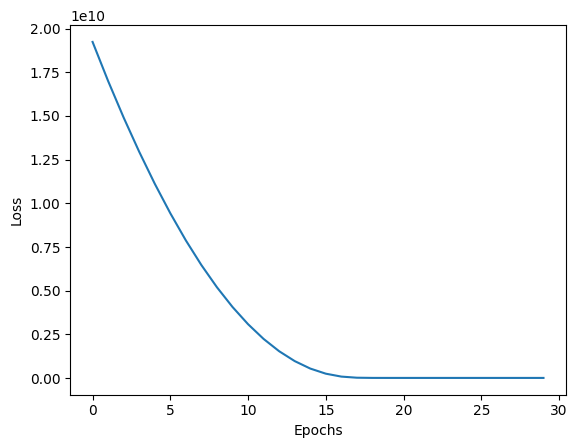

In [ ]:
fig, ax = plt.subplots(1,1)

ax.plot(loss_all)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")

plt.show()

Test the model

In [ ]:
capVolt_pred = np.array([])
capVolt_true = np.array([])
for X_test, y_test in  valloader:
    y_hat = model(X_test)

    capVolt_pred = np.concatenate((capVolt_pred, y_hat.detach().numpy().flatten()))
    capVolt_true = np.concatenate((capVolt_true, y_test.detach().numpy().flatten()))

Plot the results

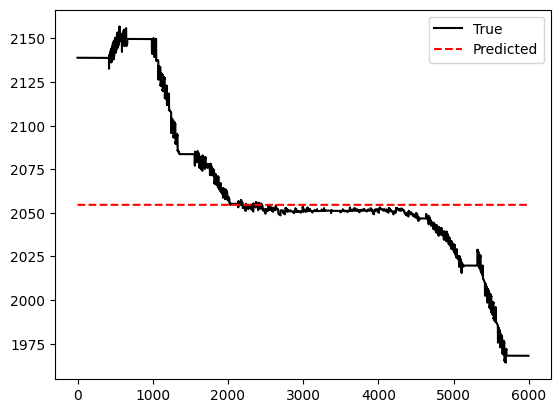

In [ ]:
fig, ax = plt.subplots(1,1)

ax.plot(capVolt_true, "k-", label="True")
ax.plot(capVolt_pred, "r--", label="Predicted")
ax.legend()

plt.show()